### Time Series Analysis

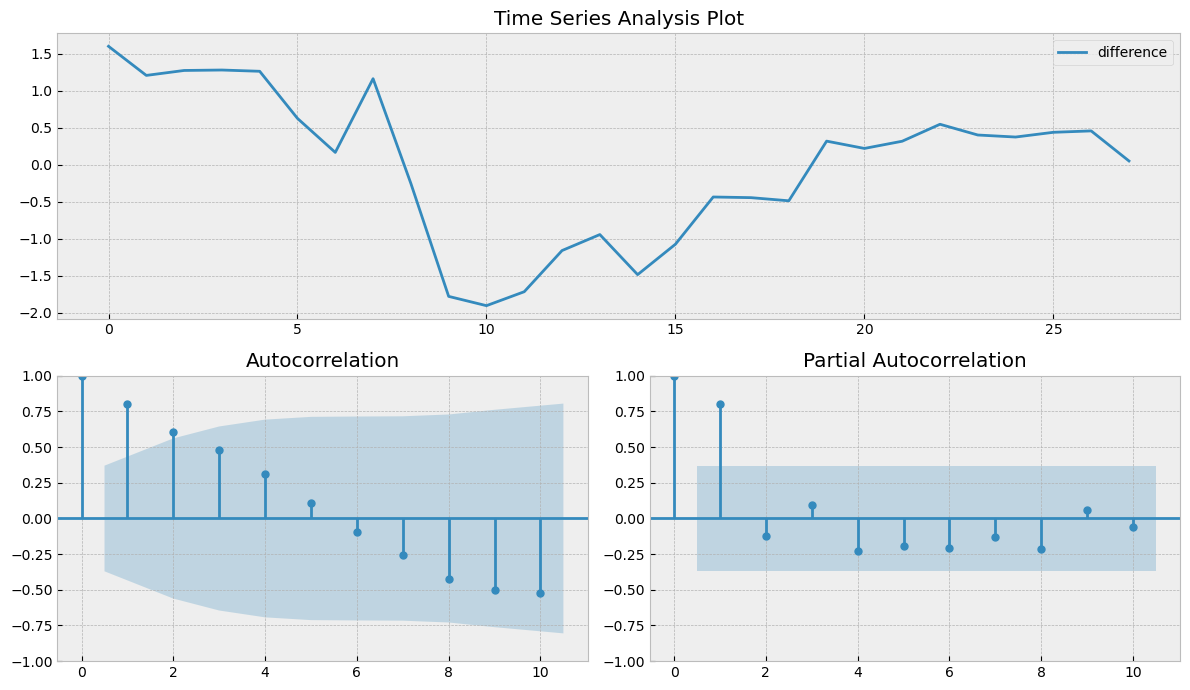

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt

#Change cities: Panama_city, Panama_city_beach, Lynn_haven, Tallahassee
city = 'Panama_city'

#Data input
city_2018_09 = pd.read_excel(city + '_2018_09.xlsx','Sheet1')[['postal_code','visits_by_day']]
city_2018_10 = pd.read_excel(city + '_2018_10.xlsx','Sheet1')[['postal_code','visits_by_day']]
df_2018_09 = city_2018_09[city_2018_09['postal_code'].isin([32401])].reset_index()
df_2018_10 = city_2018_10[city_2018_10['postal_code'].isin([32401])].reset_index()

visits_2018_09, visits_2018_10 = [0] * 30, [0] * 31
for i in range(len(df_2018_09)):
    visits_2018_09 = np.sum([visits_2018_09, eval(df_2018_09['visits_by_day'][i])], axis=0)
for i in range(len(df_2018_10)):
    visits_2018_10 = np.sum([visits_2018_10, eval(df_2018_10['visits_by_day'][i])], axis=0)

#Baseline
visits_09 = list(visits_2018_09)[2:]
baseline = (visits_09 - np.mean(visits_09)) / np.std(visits_09)
baseline = 0.2 * baseline

#Visits under a disaster
visits_10 = list(visits_2018_10)[:28]
visits = (visits_10 - np.mean(visits_10)) / np.std(visits_10)

#Difference
data = pd.DataFrame({'difference': visits - baseline})

#Plot time series, ACF, and PACF
def tsplot(data, lags = 10):
    with plt.style.context(style = 'bmh'):
        fig = plt.figure(figsize = (12,7))
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan = 2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        data.plot(ax = ts_ax)
        p_value = sm.tsa.stattools.adfuller(data)[1]
        ts_ax.set_title('Time Series Analysis Plot')
        smt.graphics.plot_acf(data, lags = lags, ax = acf_ax)
        smt.graphics.plot_pacf(data, lags = lags, ax = pacf_ax, method = 'ywm')
        plt.tight_layout()
        plt.show()

tsplot(data)